In [3]:
%cd ..

C:\Users\Talha\Documents\WinPython3\projects\News-Commentary-Tweets-of-Elites


In [1]:
import pandas as pd
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
%matplotlib inline

In [4]:
df = pd.read_csv('data/TR-headlines.csv',usecols=['newsdate','title','twcount'],parse_dates=[0])
df

,newsdate,twcount,title
0,2015-01-09,6,IŞİD’den sonra El Kaide de katliamı üstlendi
1,2015-01-09,3,TEOG sonuçları açıklandı
2,2015-01-09,7,Kaplan’ın karikatüre “zulüm” nitelemesi gündem...
3,2015-01-09,4,Taraf: “AK Parti listeleri AK Saray’da hazırla...
4,2015-01-09,25,Hollande: “Bu fanatiklerin İslam ile ilgisi yok”
5,2015-01-09,5,Saldırılar Fransa’da idam cezasını gündeme get...
6,2015-01-09,6,Batı Avrupalı liderler pazar günü Paris’e gidiyor
7,2015-01-09,8,"Arınç: “Lezbiyenler, biseksüeller ve translar ..."
8,2015-01-09,5,Fransa’da kuyumcu soygunu korkuttu
9,2015-01-09,10,İstanbul’da AVM’ye bombalı saldırı son anda ön...


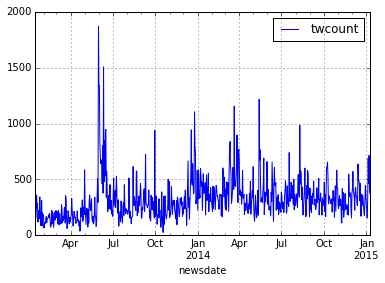

In [7]:
daily = df.groupby('newsdate').sum()
daily.plot();

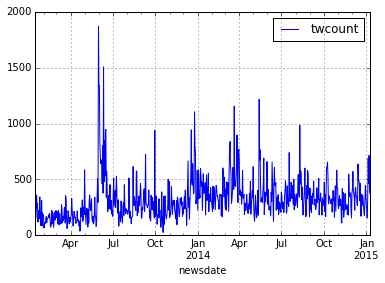

In [10]:
data = Data([Scatter(x=daily.index,y=daily.twcount)])
twc = df.groupby('newsdate').apply(lambda t: t[t.twcount == t.twcount.max()])
titles = twc[twc.newsdate.isin(daily.sort('twcount',ascending=False).head(11).index.values)]
titles = titles.sort('twcount',ascending=False)
titles = titles.reset_index(drop=True)
titles = pd.merge(titles,daily,left_on='newsdate',right_index=True)
titles.rename(columns={'twcount_x': 'twcount', 'twcount_y': 'twdaily'}, inplace=True)
titles

,newsdate,twcount,title,twdaily
0,2013-09-30,345,İşte demokratikleşme paketi,940
1,2013-05-31,284,Olaylar Taksim çevresine sıçradı,1872
2,2013-06-01,283,Başbakan’dan ilk açıklama,1343
3,2013-06-11,266,Taksim savaş alanına döndü,1508
4,2013-06-16,260,Başbakan’dan Kazlıçeşme mesajları,947
5,2013-06-02,233,Medyaya büyük öfke,1342
6,2014-03-21,225,Twitter’a erişim engellendi,1157
7,2013-12-18,167,“Büyük Rüşvet” Türkiye’yi sarstı,944
8,2013-12-25,167,İstifa eden Bayraktar: “Başbakan istifa etmeli”,1105
9,2014-05-14,147,Bilanço ağırlaşıyor: “Ölü sayısı 205′e yükseldi”,1217


In [11]:
def annotator(r):
    if r['newsdate'] == pd.to_datetime('2013-09-30'):
        y = r['twdaily']-10
    elif r['newsdate'] == pd.to_datetime('2013-06-02'):
        y = r['twdaily']-10
    else:
        y=r['twdaily']+40
    return Annotation(x=r['newsdate'], y=y, xref='x', yref='y', text=r['title'], showarrow=False)

In [13]:
annotations = Annotations(map(annotator,titles.to_dict(orient='records')))
layout = Layout(title="News Commentary Tweets of Turkish Elites (Jan 2013 - Jan 2015)",
                autosize=True,annotations=annotations,yaxis=YAxis(title='Daily tweet counts'))
fig = Figure(data=data, layout=layout)
py.iplot(fig,filename="News Commentary Tweets of Turkish Elites")

In [17]:
#these tweets belong to...
df = pd.read_csv('data/TR-tweets.csv',encoding='utf-8')
df.columns

Index(['twhandle', 'twtext', 'title', 'dt'], dtype='object')

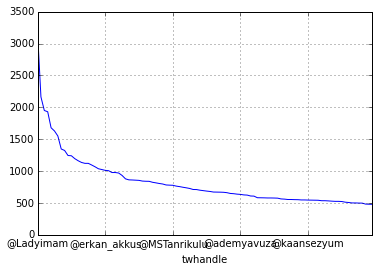

In [18]:
tweeps = df.groupby(by='twhandle')['twtext'].count().order(ascending=False).head(100)
tweeps.plot();

In [21]:
data = Data([Scatter(x=tweeps.index.values,y=tweeps.values)])
layout = Layout(title="Tweet Counts of Turkish Influencers (Jan 2013 - Jan 2015)",
                autosize=True,yaxis=YAxis(title='Total tweet counts'))
fig = Figure(data=data,layout=layout)
py.iplot(fig)